In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
#from keras.applications import ResNet50, Xception, InceptionResNetV2
from tensorflow.keras import layers
from keras.layers.normalization import BatchNormalization
import keras
import dlib
import keras
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.merge import add
from keras import regularizers
import cv2
from sklearn import preprocessing
from imutils import face_utils
import numpy as np
from keras.optimizers import SGD,Adam
from keras.layers import UpSampling2D
from tensorflow.keras import Model

from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from numpy.random import seed
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
import matplotlib.pyplot as plt             

def plot_accuracy_loss(history):
    fig = plt.figure(figsize=(10,5))
    plt.subplot(221)
    plt.plot(history.history['accuracy'], label = "acc")
    plt.plot(history.history['val_accuracy'], label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    plt.subplot(222)
    plt.plot(history.history['loss'] ,label = "loss")
    plt.plot(history.history['val_loss'], label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

In [ ]:
X_train = np.load('/content/drive/MyDrive/DATASETS/X_train_KDEF_64_1.npy')
y_train = np.load('/content/drive/MyDrive/DATASETS/y_train_KDEF_64_1.npy')
X_test = np.load('/content/drive/MyDrive/DATASETS/X_test_KDEF_64_1.npy')
y_test = np.load('/content/drive/MyDrive/DATASETS/y_test_KDEF_64_1.npy')

In [ ]:
x_train_data = X_train

print(x_train_data.shape)
x_train_data=x_train_data.reshape(-1,64,64,1)
print(x_train_data.shape)
y_train_data = to_categorical(y_train, 7)
print(y_train_data.shape)
x_test_data = X_test
print(x_test_data.shape)
x_test_data=x_test_data.reshape(-1,64,64,1)
print(x_test_data.shape)
y_test_data = to_categorical(y_test, 7)
print(y_test_data.shape)

(1210, 64, 64)
(1210, 64, 64, 1)
(1210, 7)
(1213, 64, 64)
(1213, 64, 64, 1)
(1213, 7)


In [ ]:
x_train_data[0].shape


(64, 64, 1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train_final, x_valid_final, y_train_final, y_valid_final = train_test_split(x_train_data, y_train_data, test_size=0.1, random_state=42,shuffle=True)

In [ ]:
from sklearn.metrics import classification_report
from keras.models import Sequential, load_model
fer=load_model('/content/drive/MyDrive/emotion_model.hdf5')
#fer.summary()




In [ ]:
for i in range(10):
  fer.layers[i].trainable=False

In [ ]:
for i in range(10,46):
  fer.layers[i]=True

In [ ]:
 
#sgd = SGD(lr=0.0001, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#callbacks = [ModelCheckpoint(weights, monitor='val_loss', save_best_only=True, verbose=0)]
adam=Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=False)
fer.compile(loss='categorical_crossentropy',optimizer = adam, metrics=['accuracy'])
checkpoint_filepath = '/content/drive/MyDrive/DATASETS/test_hog_testrev.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    verbose=1,

    save_best_only=True)
#model.fit(x_train_data,y_train_data,batch_size = 64,epochs=100)
history= fer.fit(x_train_final , y_train_final, batch_size=64,epochs=200,validation_data=(x_valid_final, y_valid_final), callbacks=[model_checkpoint_callback])

#model.fit(X_train, Y_train, batch_size = 1000, nb_epoch = 5, verbose = 1, shuffle = True)


Epoch 1/200
18/18 [==============================] - 20s 544ms/step - loss: 0.5659 - accuracy: 0.3605 - val_loss: 1.2759 - val_accuracy: 0.2231

Epoch 00001: val_accuracy improved from -inf to 0.22314, saving model to /content/drive/MyDrive/DATASETS/test_hog_testrev.h5
Epoch 2/200


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


18/18 [==============================] - 8s 462ms/step - loss: 0.2744 - accuracy: 0.6144 - val_loss: 1.0518 - val_accuracy: 0.4132

Epoch 00002: val_accuracy improved from 0.22314 to 0.41322, saving model to /content/drive/MyDrive/DATASETS/test_hog_testrev.h5
Epoch 3/200
18/18 [==============================] - 8s 462ms/step - loss: 0.1943 - accuracy: 0.7834 - val_loss: 0.9536 - val_accuracy: 0.3802

Epoch 00003: val_accuracy did not improve from 0.41322
Epoch 4/200
18/18 [==============================] - 8s 459ms/step - loss: 0.1825 - accuracy: 0.7857 - val_loss: 1.2352 - val_accuracy: 0.2975

Epoch 00004: val_accuracy did not improve from 0.41322
Epoch 5/200
18/18 [==============================] - 8s 459ms/step - loss: 0.1824 - accuracy: 0.7950 - val_loss: 0.8049 - val_accuracy: 0.4876

Epoch 00005: val_accuracy improved from 0.41322 to 0.48760, saving model to /content/drive/MyDrive/DATASETS/test_hog_testrev.h5
Epoch 6/200
18/18 [==============================] - 8s 459ms/step - l

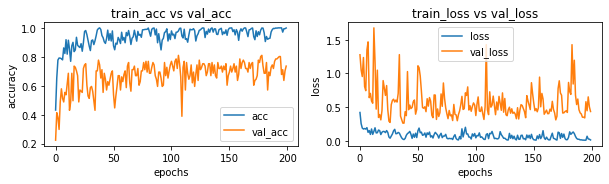

In [ ]:
plot_accuracy_loss(history)


In [ ]:

from sklearn.metrics import classification_report
from keras.models import Sequential, load_model

model=load_model('/content/drive/MyDrive/DATASETS/test_hog_test4.h5')
model.summary()
predicted = model.predict(X_test)
pred_labels = np.argmax(predicted, axis = 1)
report = classification_report(y_test, pred_labels)
print(report)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 62, 62, 8)    72          input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 62, 62, 8)    32          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 62, 62, 8)    0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [ ]:
%tensorboard --logdir logs

In [ ]:
%load_ext tensorboard



In [ ]:
import visualkeras
visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() 

In [ ]:
!pip install visualkeras

     |████████████████████████████████| 798kB 3.0MB/s 


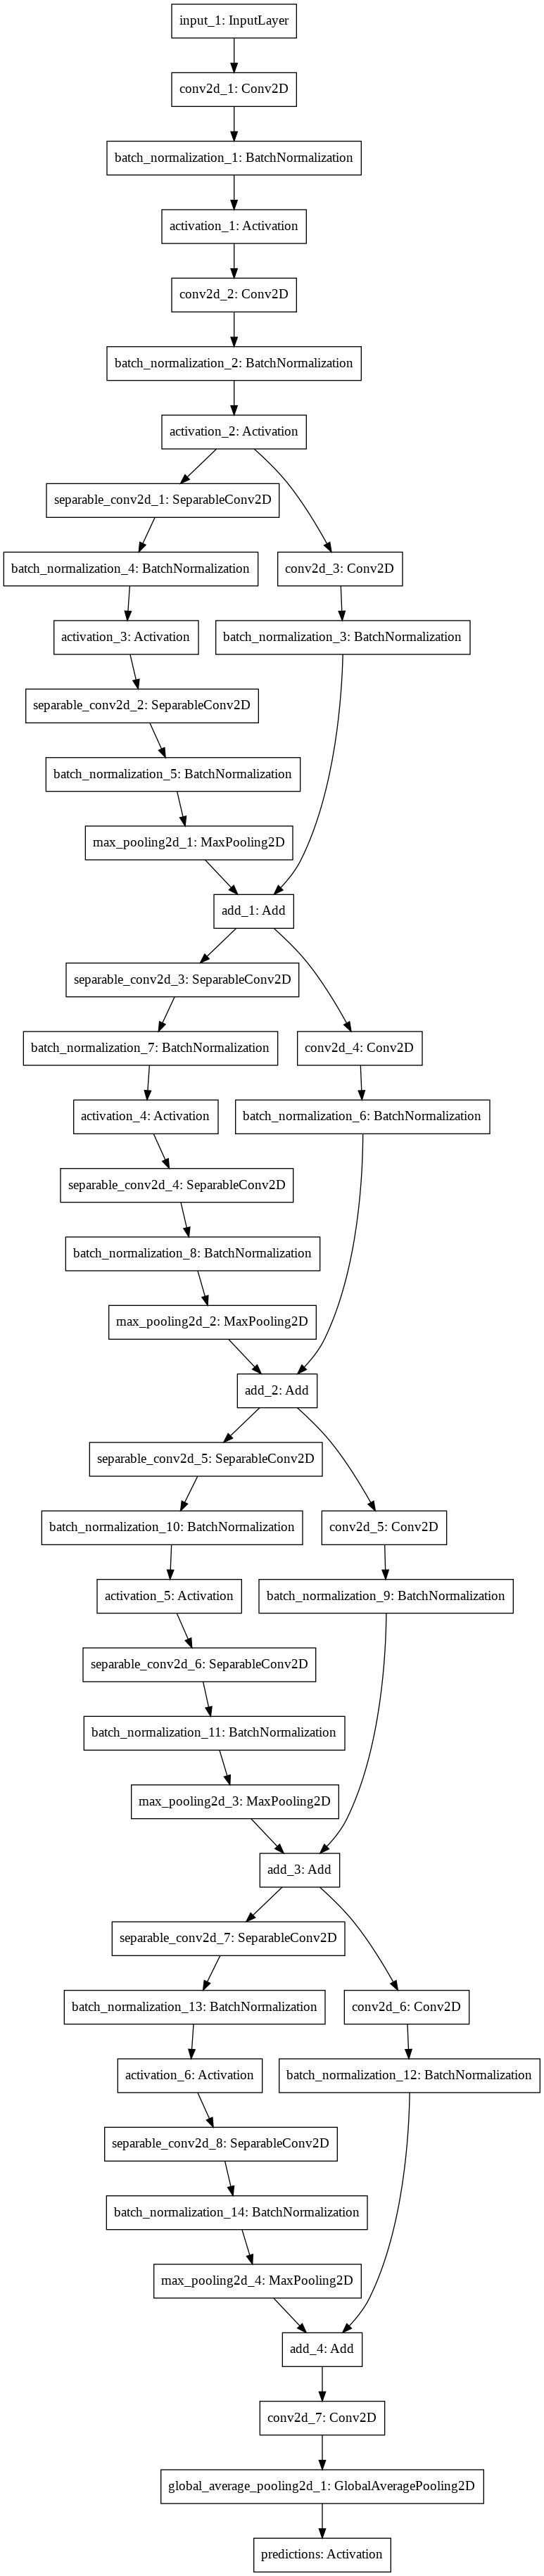

In [ ]:
from sklearn.metrics import classification_report
from keras.models import Sequential, load_model

model=load_model('/content/drive/MyDrive/DATASETS/test_hog_test4.h5')
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)
